In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# dataset kurir
df = pd.read_csv('courier.csv', sep=';')
df.sample(5)

,ID,Expedition,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delay_or_OnTime,Province_Code
953,954,JNE,Road,3,1,2298240,10,medium,F,416556,1952,1,14
7804,7805,J&T,Flight,3,3,3504816,4,medium,M,143640,5181,0,9
7523,7524,JNE,Road,4,1,3619728,3,low,M,57456,5119,1,16
2475,2476,TIKI,Flight,5,3,3806460,3,medium,M,430920,2293,1,5
5196,5197,Ninja Express,Road,3,3,3720276,3,medium,F,71820,4664,0,11


In [4]:
# dataset mapping province
df2 = pd.read_csv('mapping_province.csv', sep=';')
df2.sample(5)

,Province_Code,Province
29,30,Bali
1,2,Sumatera Utara
28,29,Bengkulu
20,21,Sumatera Selatan
31,32,Nusa Tenggara Barat


In [5]:
# merge data
merged_df = df.merge(df2, on='Province_Code', how='left')
merged_df.head(5)

,ID,Expedition,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delay_or_OnTime,Province_Code,Province
0,1,Ninja Express,Flight,4,2,2542428,3,low,F,632016,1233,1,29,Bengkulu
1,2,JNE,Flight,4,5,3102624,2,low,M,847476,3088,1,11,Kalimantan Selatan
2,3,SiCepat,Flight,2,2,2628612,4,low,M,689472,3374,1,22,Sulawesi Tengah
3,4,TIKI,Flight,3,3,2528064,4,medium,M,143640,1177,1,33,Sulawesi Selatan
4,5,J&T,Flight,2,2,2642976,3,medium,F,660744,2484,1,33,Sulawesi Selatan


In [6]:
# check columns, data types and missing values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Expedition           10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Delay_or_OnTime      10999 non-null  int64 
 12  Province_Code        10999 non-null  int64 
 13  Province             10999 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.0+ MB


In [7]:
## check missing values
merged_df.isnull().sum()

ID                     0
Expedition             0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Delay_or_OnTime        0
Province_Code          0
Province               0
dtype: int64

In [7]:
# check duplicated data
merged_df.duplicated().any()

False

In [8]:
merged_df['Cost_of_the_Product'] = merged_df['Cost_of_the_Product'].astype('float')
merged_df['Discount_offered'] = merged_df['Discount_offered'].astype('float')
merged_df.head()


,ID,Expedition,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delay_or_OnTime,Province_Code,Province
0,1,Ninja Express,Flight,4,2,2542428.0,3,low,F,632016.0,1233,1,29,Bengkulu
1,2,JNE,Flight,4,5,3102624.0,2,low,M,847476.0,3088,1,11,Kalimantan Selatan
2,3,SiCepat,Flight,2,2,2628612.0,4,low,M,689472.0,3374,1,22,Sulawesi Tengah
3,4,TIKI,Flight,3,3,2528064.0,4,medium,M,143640.0,1177,1,33,Sulawesi Selatan
4,5,J&T,Flight,2,2,2642976.0,3,medium,F,660744.0,2484,1,33,Sulawesi Selatan


In [9]:
# descriptive statistics for float/integer types
merged_df[['Customer_care_calls', 'Customer_rating','Cost_of_the_Product', 'Prior_purchases', 
           'Discount_offered', 'Weight_in_gms', 'Delay_or_OnTime']].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delay_or_OnTime
count,10999.000000,10999.000000,1.099900e+04,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.019267e+06,3.567597,192092.870988,3634.016729,0.596691
std,1.141490,1.413603,6.903808e+05,1.522860,232776.190986,1635.377251,0.490584
min,2.000000,1.000000,1.378944e+06,2.000000,14364.000000,1001.000000,0.000000
25%,3.000000,2.000000,2.427516e+06,3.000000,57456.000000,1839.500000,0.000000
50%,4.000000,3.000000,3.073896e+06,3.000000,100548.000000,4149.000000,1.000000
75%,5.000000,4.000000,3.605364e+06,4.000000,143640.000000,5050.000000,1.000000
max,7.000000,5.000000,4.452840e+06,10.000000,933660.000000,7846.000000,1.000000


In [10]:
merged_df[merged_df['Discount_offered'] >= 933660].count()

ID                     36
Expedition             36
Mode_of_Shipment       36
Customer_care_calls    36
Customer_rating        36
Cost_of_the_Product    36
Prior_purchases        36
Product_importance     36
Gender                 36
Discount_offered       36
Weight_in_gms          36
Delay_or_OnTime        36
Province_Code          36
Province               36
dtype: int64

In [11]:
# descriptive statistics for object types
merged_df.select_dtypes('object').describe()

,Expedition,Mode_of_Shipment,Product_importance,Gender,Province
count,10999,10999,10999,10999,10999
unique,5,3,3,2,34
top,JNE,Ship,low,F,DKI Jakarta
freq,3666,7462,5297,5545,354


In [12]:
print('Expeditions: \n', merged_df['Expedition'].value_counts())
print('=======================')
print('Mode_of_Shipment: \n', merged_df['Mode_of_Shipment'].value_counts())
print('=======================')
print('Product_importance: \n', merged_df['Product_importance'].value_counts())


Expeditions: 
 JNE              3666
Ninja Express    1834
TIKI             1833
SiCepat          1833
J&T              1833
Name: Expedition, dtype: int64
Mode_of_Shipment: 
 Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
Product_importance: 
 low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64


In [14]:
merged_df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delay_or_OnTime,Province_Code
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822,0.000490
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126,0.017083
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119,0.004688
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587,-0.007024
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515,-0.009501
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108,-0.007463
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793,-0.012091
Delay_or_OnTime,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000,-0.005266
Province_Code,0.000490,0.017083,0.004688,-0.007024,-0.009501,-0.007463,-0.012091,-0.005266,1.000000


In [18]:
nums = ['Customer_care_calls', 'Customer_rating','Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


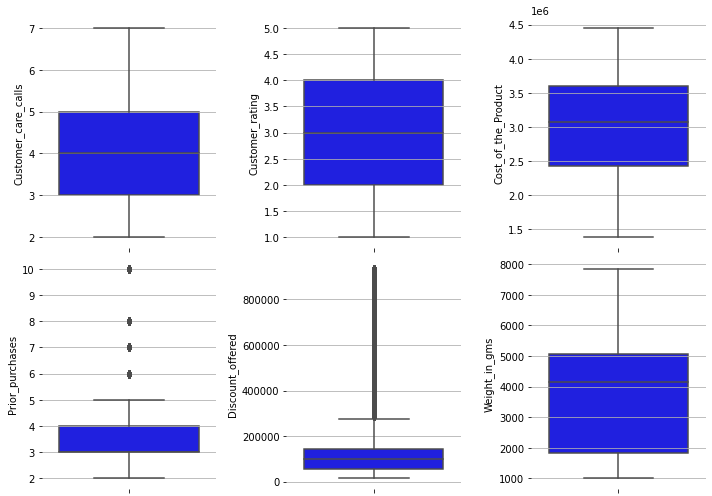

In [25]:
plt.figure(figsize=(10,7))
for i in range(len(nums)):
    plt.subplot(2, 3, i+1)
    sn.boxplot(y=df[nums[i]], color='b', orient='v')
    plt.grid(axis='y')
    sn.despine(top=True, right=True, left=True, bottom=True)
    plt.tight_layout()


In [1]:
3557 + 3217 + 2328+ 1013 + 638 + 246 

10999

In [30]:
import scipy.stats
print('-'*15, 'Skewness Score', '-'*15)
for i in range(len(nums)):
    skewness_score = scipy.stats.skew(merged_df[nums[i]])
    if skewness_score <= 0.5 and skewness_score >= -0.5:
        print(
            f'Skewness Score {nums[i]} : {scipy.stats.skew(merged_df[nums[i]])}\n(Normal Distribution)')
    elif skewness_score > 0.5:
        print(
            f'Skewness Score {nums[i]} : {scipy.stats.skew(merged_df[nums[i]])}\n(Right Skewness)')
    else:
        print(
            f'Skewness Score {nums[i]} : {scipy.stats.skew(merged_df[nums[i]])}\n(Left Skewness)')
    print('=================================================')


--------------- Skewness Score ---------------
Skewness Score Customer_care_calls : 0.3918723238934225
(Normal Distribution)
Skewness Score Customer_rating : 0.00435900450181738
(Normal Distribution)
Skewness Score Cost_of_the_Product : -0.1570956914477532
(Normal Distribution)
Skewness Score Prior_purchases : 1.6816679361740619
(Right Skewness)
Skewness Score Discount_offered : 1.7986837686316184
(Right Skewness)
Skewness Score Weight_in_gms : -0.24971269621623338
(Normal Distribution)


Prior Purchase and discount offered have right skewness

In [20]:
# iqr
q1 = merged_df['Discount_offered'].quantile(0.25)
q3 = merged_df['Discount_offered'].quantile(0.75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
print('iqr :' , iqr)
print('upper:' , upper)
print('lower:', lower)


iqr : 86184.0
upper: 272916.0
lower: -71820.0


In [22]:
merged_df[merged_df['Discount_offered'] >= 272916]

,ID,Expedition,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delay_or_OnTime,Province_Code,Province
0,1,Ninja Express,Flight,4,2,2542428,3,low,F,632016,1233,1,29,Bengkulu
1,2,JNE,Flight,4,5,3102624,2,low,M,847476,3088,1,11,Kalimantan Selatan
2,3,SiCepat,Flight,2,2,2628612,4,low,M,689472,3374,1,22,Sulawesi Tengah
4,5,J&T,Flight,2,2,2642976,3,medium,F,660744,2484,1,33,Sulawesi Selatan
7,8,JNE,Flight,4,1,3346812,2,low,F,689472,2804,1,9,Sulawesi Tenggara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,3129,SiCepat,Road,3,1,2427516,3,high,M,344736,1740,1,34,Kepulauan Riau
3130,3131,J&T,Road,6,5,3533544,4,medium,M,718200,3618,1,28,DIY Yogyakarta
3131,3132,JNE,Road,4,1,3332448,3,medium,M,790020,2686,1,14,DKI Jakarta
3132,3133,Ninja Express,Road,3,5,3605364,3,low,F,301644,2476,1,13,Kalimantan Utara


There are 2.262 rows oultiers (right skewness) for discount offered feature. These outliers won't be removed as some outliers may be important to the analysis.

In [32]:
merged_df['cost_after_disc'] = merged_df['Cost_of_the_Product'] - merged_df['Discount_offered']

In [33]:
merged_df.sample(5)

,ID,Expedition,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Delay_or_OnTime,Province_Code,Province,cost_after_disc
418,419,J&T,Flight,5,2,2556792,3,low,M,689472,1517,1,1,Sulawesi Utara,1867320
1699,1700,JNE,Ship,3,2,3203172,4,low,F,287280,3955,1,1,Sulawesi Utara,2915892
4287,4288,TIKI,Ship,2,3,2111508,3,low,F,71820,5013,0,11,Kalimantan Selatan,2039688
10825,10826,JNE,Flight,4,4,3705912,3,medium,M,114912,5324,1,26,Nusa Tenggara Timur,3591000
9962,9963,SiCepat,Ship,4,2,3662820,5,low,F,100548,1378,0,26,Nusa Tenggara Timur,3562272


In [35]:
merged_df[merged_df['Cost_of_the_Product'] < merged_df['Discount_offered']].count()

ID                     0
Expedition             0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Delay_or_OnTime        0
Province_Code          0
Province               0
cost_after_disc        0
dtype: int64

There are not negative cost. So I decide to not remove the outliers. Because, some of outliers are important.

In [38]:
merged_df.to_csv('data_cleaning.csv', index=False)

In [16]:
merged_df.columns

Index(['ID', 'Expedition', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Delay_or_OnTime', 'Province_Code', 'Province'],
      dtype='object')